(-1.1155, 23.4255)

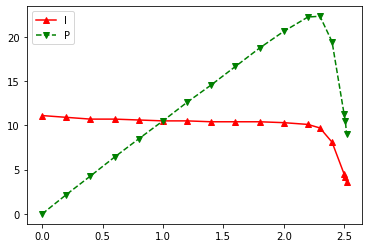

In [14]:
import numpy as np
import sdf 
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
#from matplotlib.mlab import bivariate_normal
from functools import reduce
import multiprocessing as mp
import sys, getopt
import os, time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import constant as const
%matplotlib inline

V1=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.3,2.4,2.5,2.51,2.52]
I1=[11.1,10.9,10.7,10.7,10.6,10.5,10.5,10.4,10.4,10.4,10.3,10.1,9.7,8.1,4.5,4.2,3.6]
P1=[0,2.18,4.28,6.42,8.48,10.5,12.6,14.56,16.64,18.72,20.6,22.22,22.31,19.44,11.25,10.54,9.07]
V2=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2,2,2,3,2.4,2.45]#,2.45]
I2=[16,16,16,15.9,16,15.9,15.8,15.7,15.5,14.8,13.5,10.8,8.5,5.2,2.8]
P2=[0,3.2,6.4,9.54,12.8,15.9,18.96,21.98,24.8,26.64,27,23.76,19.55,12.48,6.86]
V3=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,1.9,2.0,2,2,2,3,2.4]
I3=[2.2,2.1,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.3,1.3,1.2,1.1,1.0,0.791,0.619]
P3=[0,0.42,0.84,1.2,1.52,1.8,2.04,2.24,2.4,2.34,2.47,2.4,2.31,2.2,1.82,1.49]


plt.plot(V1,I1,'r^-',label='I')
plt.plot(V1,P1,'gv--',label='P')
plt.legend()
plt.xlabel()
plt.xlabel(V)

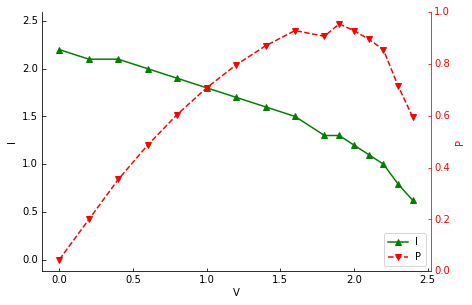

In [31]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('I')
ax_cof.set_xlabel('V')
ax_temp.set_ylabel('P')
ax_load.set_ylabel('load')
ax_cp.set_ylabel('CP')
ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

#ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
V1=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.3,2.4,2.5,2.51,2.52]
I1=[11.1,10.9,10.7,10.7,10.6,10.5,10.5,10.4,10.4,10.4,10.3,10.1,9.7,8.1,4.5,4.2,3.6]
P1=[0,2.18,4.28,6.42,8.48,10.5,12.6,14.56,16.64,18.72,20.6,22.22,22.31,19.44,11.25,10.54,9.07]

V2=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.3,2.4,2.45]#,2.45]
I2=[16,16,16,15.9,16,15.9,15.8,15.7,15.5,14.8,13.5,10.8,8.5,5.2,2.8]
P2=[0,3.2,6.4,9.54,12.8,15.9,18.96,21.98,24.8,26.64,27,23.76,19.55,12.48,6.86]

V3=[0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,1.9,2.0,2.1,2.2,2.3,2.4]
I3=[2.2,2.1,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.3,1.3,1.2,1.1,1.0,0.791,0.619]
P3=[0,0.42,0.84,1.2,1.52,1.8,2.04,2.24,2.4,2.34,2.47,2.4,2.31,2.2,1.82,1.49]

curve_cof, = ax_cof.plot(V3, I3, 'g^-',label="I")#, color='black')
scatter_cof = ax_cof.plot(V3, P3,'rv--', label="P")#, color='black')

#curve_temp, = ax_temp.plot(density, a0, label="a0", color='red')
#curve_load, = ax_load.plot(density, freqs, label="freqs", color='green')
#curve_cp, = ax_cp.plot(density, k, label="k", color='pink')
#curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')


#ax_temp.set_ylim(0,4)
#ax_load.set_ylim(0,4)
#ax_cp.set_ylim(0,50)
#ax_wear.set_ylim(0,30)

ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
#ax_load.axis['right2'].label.set_color('green')
#ax_cp.axis['right3'].label.set_color('pink')
#ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
#ax_load.axis['right2'].major_ticks.set_color('green')
#ax_cp.axis['right3'].major_ticks.set_color('pink')
#ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
#ax_load.axis['right2'].major_ticklabels.set_color('green')
#ax_cp.axis['right3'].major_ticklabels.set_color('pink')
#ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
#ax_load.axis['right2'].line.set_color('green')
#ax_cp.axis['right3'].line.set_color('pink')
#ax_wear.axis['right4'].line.set_color('blue')

plt.show()
fig.savefig('./dwq/'+'v3'+'.png',format='png',bbox_inches = 'tight')